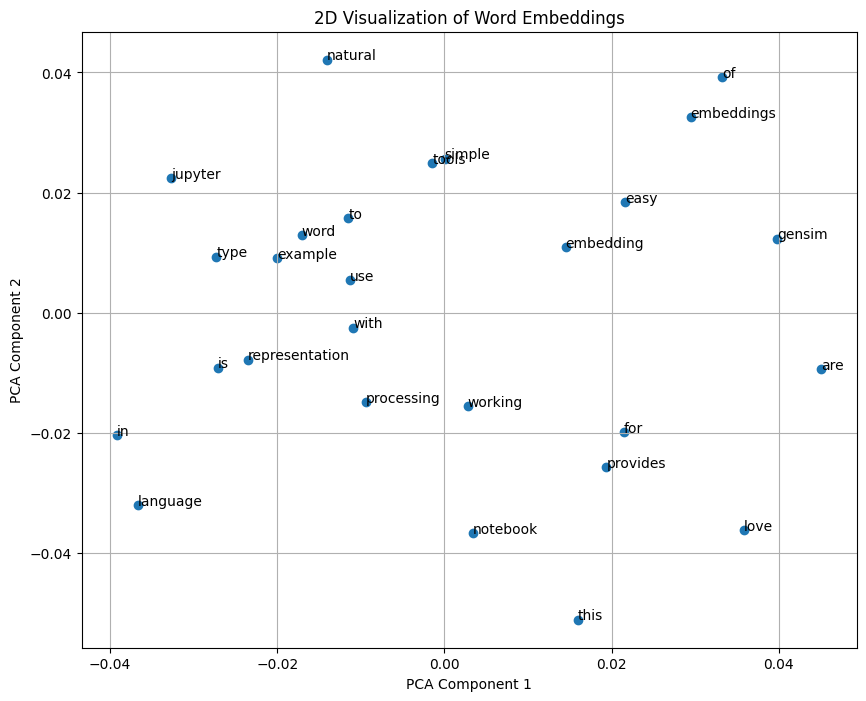

In [6]:
# Import necessary libraries
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample text data
sentences = [
    "I love natural language processing",
    "Word embeddings are a type of word representation",
    "Gensim provides easy-to-use tools for working with embeddings",
    "This is a simple example for word embedding in Jupyter Notebook"
]

# Preprocess sentences: tokenize and lower-case
processed_sentences = [simple_preprocess(sentence) for sentence in sentences]

# Create and train the Word2Vec model
model = Word2Vec(sentences=processed_sentences, vector_size=50, window=5, min_count=1, sg=0)

# Extract word vectors
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the 2D word vectors
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Annotate points with word labels
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Word Embeddings')
plt.grid(True)
plt.show()
